<a href="https://colab.research.google.com/github/mrefugionv/S11---ALIMENTOS_PRUEBA_AAB/blob/main/P11_ANAEST_EMBUDO_PRUEBAAA_ALIMENTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO SPRINT 11 : PROYECTO DEL MÓDULO 2
María del Refugio Noriega Vargas

## DESCRIPCIÓN DEL PROYECTO

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos.

## PREPROCESAMIENTO DE DATOS
### ABRIR ARCHIVO DE DATOS Y LEER INFORMACIÓN

In [ ]:
# Importación de librerías necesarias
import pandas as pd            # Manejo de dataframes
import datetime as dt          # Manejo de fechas
import matplotlib.pyplot as plt  # Graficar
import numpy as np              # Matrices
import seaborn as sns              # Gráfico caja- bigotes
import scipy.stats as stats         # Métodos estadísticos

In [ ]:
#Lectura de los datos
data = pd.read_csv('datasets/logs_exp_us.csv', sep='\t')
display(data.head())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### PREPARAR LOS DATOS PARA EL ANÁLISIS

#### CAMBIO NOMBRE DE COLUMNAS

In [ ]:
# Correción de nombres de columnas a snake_case
data.columns =['event_name','device_id_hash','event_timestamp','exp_id']
display(data.head(2))

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


#### CORRECCIÓN TIPO DE DATOS Y VALORES AUSCENTES

Se tienen 244126 registros con 4 columnas, ninguna de ellas con valores nulos, con las siguientes características:
* event_name: describre el nombre del evento - tipo de dato objeto, puede tener 4 valores : 'MainScreenAppear', 'PaymentScreenSuccessful' ,'CartScreenAppear', 'OffersScreenAppear', 'Tutorial'
* device_id_hash: identificador de usuario unívoco - tipo de dato entero, se cambia a string, ya que no se realizan operaciones matemáticas con los identificadores.
* event_time_stamp: hora del evento - tipo de dato entero, de convierte a time stamp.
  NOTA: la fecha se encuentra en Unix time, que representa el numero de segundos desde 00:00:00 UTC (Coordinated Universal Time) en  01-01-1970
* exp_id: némero de experimento. 246 y 247 son los grupos de control, y 248 es el grupo de prueba.- tipo de dato entero, se cambia a string, ya que no se realizan operaciones matemáticas con los identificadores.

In [ ]:
# Revisión de info general del df
print(data.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None



In [ ]:
# Se realizan cambios
data['device_id_hash'] = data['device_id_hash'].astype('string')
data['exp_id'] = data['exp_id'].astype('string')

# Obtención de fecha a partir de Unix time
data['event_timestamp']= data['event_timestamp'].map(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
print(data.head())
print(data.info())

C:\Users\cucum\AppData\Local\Temp\ipykernel_13704\1040669263.py:6: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  data['event_timestamp']= data['event_timestamp'].map(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))


                event_name       device_id_hash      event_timestamp exp_id
0         MainScreenAppear  4575588528974610257  2019-07-25 04:43:36    246
1         MainScreenAppear  7416695313311560658  2019-07-25 11:11:42    246
2  PaymentScreenSuccessful  3518123091307005509  2019-07-25 11:28:47    248
3         CartScreenAppear  3518123091307005509  2019-07-25 11:28:47    248
4  PaymentScreenSuccessful  6217807653094995999  2019-07-25 11:48:42    248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  string
 2   event_timestamp  244126 non-null  object
 3   exp_id           244126 non-null  string
dtypes: object(2), string(2)
memory usage: 7.5+ MB
None


#### COLUMNA DE FECHA

In [ ]:
# conversi+on a tipo de dato datetime
data['event_timestamp'] = data['event_timestamp'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# Crear columna con número de mes
data['event_date'] = data['event_timestamp'].dt.date
print(data.head())
print(data.info())

                event_name       device_id_hash     event_timestamp exp_id  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248   

   event_date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  string        
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   exp_id           244126 non-null  string        
 

## ANÁLISIS EXPLORATORIO
### ESTUDIAR Y COMPROBAR LOS DATOS

#### ¿CUÁNTOS EVENTOS HAY EN LOS REGISTROS?
5 eventos:
* 'MainScreenAppear',
* 'PaymentScreenSuccessful' ,
* 'CartScreenAppear',
* 'OffersScreenAppear',
* 'Tutorial'

In [ ]:
print(f'Valores posibles de nombre de evento:\n ', data['event_name'].unique())

Valores posibles de nombre de evento:
  ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


#### ¿CUÁNTOS USUARIOS HAY EN LOS REGISTROS?

7551 usuarios únicos.

In [ ]:
print(f'Usuarios únicos : ',data['device_id_hash'].nunique())

Usuarios únicos :  7551


#### ¿CUÁL ES EL PROMEDIO DE EVENTOS POR USUARIO?
En promedio cada usuario realiza 32.33 eventos.

In [ ]:
print(f'Total de eventos: ', data['event_name'].count())
print(f'Usuarios únicos : ',data['device_id_hash'].nunique())
print (f'Promedio de eventos por usuario: ', (data['event_name'].count())/(data['device_id_hash'].nunique()))

Total de eventos:  244126
Usuarios únicos :  7551
Promedio de eventos por usuario:  32.33028737915508


#### ¿QUÉ PERIODO DE TIEMPO CUBREN LOS DATOS?

De  2019-07-25 04:43:36  a  2019-08-07 21:15:17

In [ ]:
print (f' Fecha mínima: ', data['event_timestamp'].min())
print (f' Fecha máxima: ', data['event_timestamp'].max())

 Fecha mínima:  2019-07-25 04:43:36
 Fecha máxima:  2019-08-07 21:15:17


#### HISTOGRAMA POR FECHA Y HORA

¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?  Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

No, la constancia en las frecuencias se nota a partir del 2019-08-01; antes parecen estar inclompetos. Por lo que el periodo que realmente son representativos estan entre 2019-08-01 y 2019-08-07.


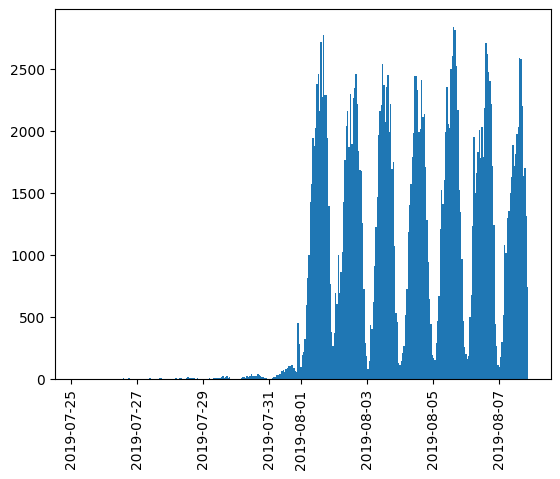

In [ ]:
plt.hist(data['event_timestamp'],bins=336)
plt.xticks(rotation=90)
plt.show()

#### ¿PERDISTE MUCHOS EVENTOS Y USUARIOS AL EXCLUIR LOS DATOS MÁS ANTIGUOS?

**Al eliminar las filas de las fechas anteriores al 2019-08-01, obtuvimos un dataframe de 205,955 registros, lo que quiere decir que se eliminaron 38,171 registros de los 244,126 con los que contabamos originalmente: esto representa un 15.63% de pérdida de datos.**



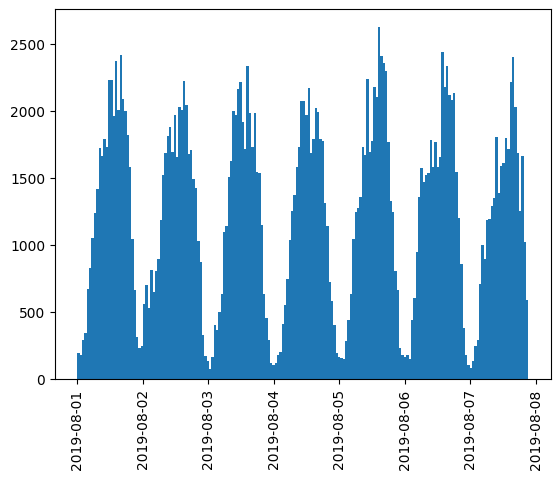

Nueva cantidad de filas:  241298
Cantidad de filas eliminadas:  2828
Porcentaje de filas eliminadas:  1.1584181938834917


In [ ]:
# Filtramos df, eliminando las filas con fecha menor al '2019-08-01 0:00:00'
data = data[data['event_timestamp'] > '2019-08-01 0:00:00']

# Observamos el nuevo histograma por fecha y hora
plt.hist(data['event_timestamp'],bins=192)
plt.xticks(rotation=90)
plt.show()

# Cantidad de filas eliminadas
print(f'Nueva cantidad de filas: ', len(data['event_timestamp']))
print(f'Cantidad de filas eliminadas: ', (244126-(len(data['event_timestamp']))))
print(f'Porcentaje de filas eliminadas: ', 100-((len(data['event_timestamp'])*100)/244126))

#### ASEGÚRATE DE TENER USUARIOS DE LOS TRES GRUPOS
Sí tenemos datos de los para los tres grupos:

 Para los grupos control:
   * 246 - 68,021 registros.
   * 247 - 65,209 registros.

 Para el grupo prueba:
 * 248 - 72,725 registros

In [ ]:
data_246 = data[data['exp_id']== '246']
print(f'Registros para grupo control 246: ', len(data_246['event_name']))
data_247 = data[data['exp_id']=='247']
print(f'Registros para grupo control 247: ', len(data_247['event_name']))
data_248 = data[data['exp_id']=='248']
print(f'Registros para grupo prueba 248: ', len(data_248['event_name']))

Registros para grupo control 246:  79425
Registros para grupo control 247:  77147
Registros para grupo prueba 248:  84726


## ANÁLISIS ESTADÍSTICO
### EMBUDO DE VENTAS

Descubre cómo los usuarios llegan a la etapa de compra.


#### FRECUENCIA DE CADA EVENTO
Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

Obtenemos el siguiente resultado:

| Nombre de evento  |  Frecuencia |
|-----------------  |  ---------- |
|'MainScreenAppear' | 99891|
| 'OffersScreenAppear'| 39520|
| 'CartScreenAppear'| 36270|
| 'PaymentScreenSuccessful'| 29429|
 |'Tutorial'| 845|


In [ ]:
events =['MainScreenAppear','PaymentScreenSuccessful','CartScreenAppear','OffersScreenAppear', 'Tutorial']

# Crear diccionario ['nombre_evento':frecuencia]
events_freq ={ }
for event in events:
    data_filtered = data[data['event_name']== event]
    freq = len(data_filtered['event_name'])
    events_freq.update({ event : freq})

# Ordenar diccionario por frecuencia de mayor a menor
events_freq_sorted = dict(sorted(events_freq.items(), key=lambda item: item[1],reverse= True))

display(events_freq_sorted)

{'MainScreenAppear': 117431,
 'OffersScreenAppear': 46350,
 'CartScreenAppear': 42365,
 'PaymentScreenSuccessful': 34113,
 'Tutorial': 1039}

#### USUARIOS POR EVENTO

Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios.
Calcula la proporción de usuarios que realizaron la acción al menos una vez.

Los resultados obtenidos son:

| Nombre evento | Cantidad de usuarios | Proporción de usuarios a etapa anterior (%) |
|--------------- |-----------------|----------|
|'MainScreenAppear' |7170| 100|
| 'OffersScreenAppear'|3984|56.52|
|'CartScreenAppear'|1658| 42.06|
|'PaymentScreenSuccessful'|401|25.69|
|'Tutorial'|695|11.32|



In [ ]:
# Tabla pivote de la primera fecha en que realiza cada unoa de las acciones cada usuario
users = data.pivot_table(
    index='device_id_hash',
    columns='event_name',
    values='event_timestamp',
    aggfunc='min')
display(users.head())

# Cuenta los usuarios que si tienen fecha de realización de evento
#... y esa fecha es anterior a la etapa anterior.
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])
step_5 = ~users['Tutorial'].isna()

#conteo de usuarios por etapa
n_mainscreen = users[step_1].shape[0]
n_offerscreen = users[step_2].shape[0]
n_cartscreen = users[step_3].shape[0]
n_payment = users[step_4].shape[0]
n_tutorial = users[step_5].shape[0]

print()
print('Visitantes página principal:', n_mainscreen)
print('Revisión de productos:', n_offerscreen)
print('Agrego al carrito:', n_cartscreen)
print('Pagado:', n_payment)
print('Vio el tutorial:', n_tutorial)

#Proporción de usuarios = (usuarios por evento * 100) /usuarios etapa anterior
print()
print('Visitantes página principal:', n_mainscreen*100/n_mainscreen)
print('Revisión de productos:', n_offerscreen*100/n_mainscreen)
print('Agrego al carrito:', n_cartscreen*100/n_offerscreen)
print('Pagado:', n_payment*100/ n_cartscreen)
print('Vio el tutorial:', n_tutorial*100/n_mainscreen)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
1000608915523616548,NaT,2019-08-01 16:05:50,2019-08-07 16:15:07,NaT,NaT
100724994572555335,NaT,2019-08-05 16:06:45,NaT,NaT,NaT
1008242126838007188,2019-08-01 09:32:23,2019-08-01 09:32:21,2019-08-01 09:32:29,2019-08-01 09:32:23,NaT
1009503747199967885,2019-08-05 09:59:26,2019-08-04 16:34:04,2019-08-04 16:30:26,2019-08-05 09:59:25,NaT
1009745980451513098,2019-08-01 15:29:00,2019-08-01 15:28:01,2019-08-01 15:38:05,2019-08-02 16:36:07,NaT



Visitantes página principal: 7419
Revisión de productos: 4201
Agrego al carrito: 1767
Pagado: 454
Vio el tutorial: 840

Visitantes página principal: 100.0
Revisión de productos: 56.62488205957676
Agrego al carrito: 42.06141394905975
Pagado: 25.693265421618563
Vio el tutorial: 11.322280630812777


#### ¿TODAS LAS ACCIONES SON PARTE DE UNA SOLA SECUENCIA?
¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

**No todas las acciones son secuenciales; para ver el tutorial no es necesario realizar niguna compra. Tenemos dos secuencias:**

Secuecia 1:
*    Página principal - 'MainScreenAppear'
*    Página de ventas - 'OffersScreenAppear'
*    Página de carrito - 'CartScreenAppear'
*    Página de pago  - 'PaymentScreenSuccessful'
  
Secuencia 2:
*  Página principal - 'MainScreenAppear'
*  Tutorial - 'Tutorial'


#### APLICACIÓN DE EMBUDO DE EVENTOS

Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

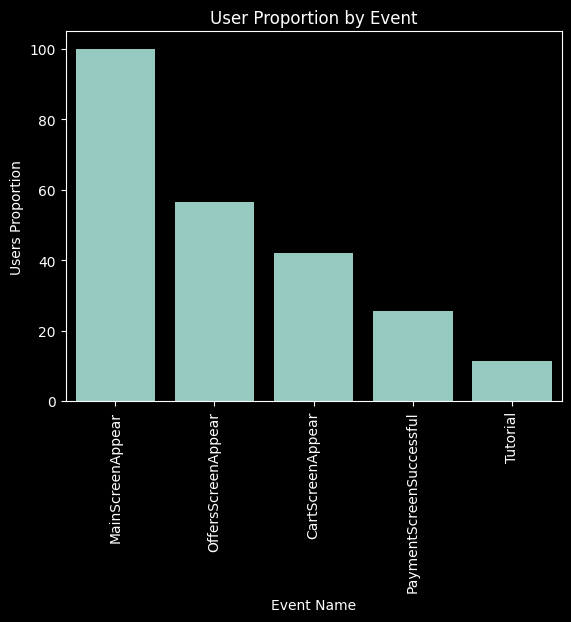

In [ ]:
# Crear un DataFrame usando los datos obtenidos anteriormente
funnel ={
    'events' : ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful','Tutorial'],
    'event_users': [ n_mainscreen, n_offerscreen, n_cartscreen, n_payment, n_tutorial],
    # Proporción de usuarios que pasan de una etapa a la siguiente
    'event_user_proportion' : [ (n_mainscreen*100)/n_mainscreen,
                (n_offerscreen*100)/n_mainscreen,
                (n_cartscreen*100)/ n_offerscreen,
                (n_payment*100)/n_cartscreen,
               (n_tutorial*100)/n_mainscreen]
}

funnel_data = pd.DataFrame(funnel)

#Crear gráfico Porcentaje de usuarios
plt.style.use("dark_background")
sns.barplot(x='events', y='event_user_proportion', data=funnel_data)
plt.xlabel('Event Name')
plt.ylabel('Users Proportion')
plt.title('User Proportion by Event')
plt.xticks(rotation=90)
plt.show()


#### ¿EN QUE ETAPA SE PIERDEN MÁS USUARIOS?

En el paso de la etapa del carrito al pago exitoso, solo el 25.69% de los usuarios con productos en el carrito finalizan su compra.

También se observa un bajo porcentaje de usuarios que ven el tutorial de la página, solo el 11% de los visitantes totales de la página principal.

#### ¿QUÉ PORCENTAJE DE USUARIOS HACE TODO EL VIAJE DESDE SU PRIMER EVENTO HASTA EL PAGO?

**Solo el 6.11% llego a completar la compra**

In [ ]:
print(f'Percentage from total users that complete payment: ', (n_payment*100)/n_mainscreen)


Percentage from total users that complete payment:  6.119423102844049


## ANÁLISIS DE NEGOCIO
### TEST A/A/B

Crear dos grupos A permite establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

#### ¿CUÁNTOS USUARIOS HAY POR GRUPO?

Como se obtuvo en la sección de análisi exploratorio, hay:

* Registros para grupo control 246:  79,425
* Registros para grupo control 247:  77,147
* Registros para grupo prueba 248:  84,726

**Y la cantidad de usurios únicos respectivos son:**

* Usuarios únicos para grupo control 246:  2484
* Usuarios únicos para grupo control 247:  2513
* Usuarios únicos para grupo prueba 248:  2537

In [ ]:
print(f'Usuarios únicos para grupo control 246: ', data_246['device_id_hash'].nunique())
print(f'Usuarios únicos para grupo control 247: ', data_247['device_id_hash'].nunique())
print(f'Usuarios únicos para grupo prueba 248: ', data_248['device_id_hash'].nunique())

Usuarios únicos para grupo control 246:  2484
Usuarios únicos para grupo control 247:  2513
Usuarios únicos para grupo prueba 248:  2537


#### ¿HAY DIFERENCIAS ESTADÍSTICAS EN ENTRE LOS GRUPOS CONTROL A/A?

Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron cada acción y encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa.¿Puedes confirmar que los grupos se dividieron correctamente?

**Sí, los grupos se han dividido de manera equitativa. Lo cantidad de usuarios que realizó cada cada acción son muy parecidas, al igual que las tasas de conversión.**

**Ademas pudimos comprobar, aplicando el método de Mann-Whitney a las series de número de día para cada usuario en cada acción y utilizando el nivel de significacia corregido por el método de Bonferroni (0.05 a 0.016), que no podemos descartar la Hipótesis nula en ninguno de los casos (eventos). Es decir; que no hay diferencia significativa entre sus medias.**

In [ ]:

# Función que te regresa:
#como primer valor [0] la tabla de embudo:
#evento | cantidad de usuarios que lo realizo | proporción de usurios a evento anterior
#como segundo valor [1] la tabla pivote
# index: id_usuario, col: 'nombre evento, valores: fecha min
def embudo(data):
    # Tabla pivote de la primera fecha en que realiza cada una de las acciones cada usuario
    users = data.pivot_table(
        index='device_id_hash',
        columns='event_name',
        values='event_timestamp',
        aggfunc='min')

    # Cuenta los usuarios que si tienen fecha de realización de evento
    #... y esa fecha es anterior a la estapa anterior.
    step_1 = ~users['MainScreenAppear'].isna()
    step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
    step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
    step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])
    step_5 = ~users['Tutorial'].isna()

    #conteo de usuarios por etapa
    n_mainscreen = users[step_1].shape[0]
    n_offerscreen = users[step_2].shape[0]
    n_cartscreen = users[step_3].shape[0]
    n_payment = users[step_4].shape[0]
    n_tutorial = users[step_5].shape[0]

    events = ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful','Tutorial']
    event_users = [ n_mainscreen, n_offerscreen, n_cartscreen, n_payment, n_tutorial]
    event_user_proportion = [ (n_mainscreen*100)/n_mainscreen,
                (n_offerscreen*100)/n_mainscreen,
                (n_cartscreen*100)/ n_offerscreen,
                (n_payment*100)/n_cartscreen,
               (n_tutorial*100)/n_mainscreen]

    # Crear un DataFrame usando los datos obtenidos anteriormente
    funnel ={ 'events' : events, 'event_users': event_users,
              # Proporción de usuarios que pasan de una etapa a la siguiente
              'event_user_proportion' :event_user_proportion }

    funnel_data = pd.DataFrame(funnel)
    return(funnel_data, users)

embudo_246 = embudo(data_246)
display(f'Embudo 246:' ,embudo_246[0])
embudo_247 = embudo(data_247)
display(f'Embudo 246:' ,embudo_247[0])


'Embudo 246:'

,events,event_users,event_user_proportion
0,MainScreenAppear,2450,100.000000
1,OffersScreenAppear,1411,57.591837
2,CartScreenAppear,584,41.389086
3,PaymentScreenSuccessful,145,24.828767
4,Tutorial,278,11.346939


'Embudo 246:'

,events,event_users,event_user_proportion
0,MainScreenAppear,2476,100.000000
1,OffersScreenAppear,1379,55.694669
2,CartScreenAppear,600,43.509790
3,PaymentScreenSuccessful,144,24.000000
4,Tutorial,283,11.429725


In [ ]:
# Función prueba estadística de las series de valor de día de cada evento
def dif_estadistica_evento(data1, data2, column, alpha):
    sampleA = data1[column].dt.day.dropna()
    sampleB = data2[column].dt.day.dropna()
    p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
    if p_value < float(alpha):
        return (f' Hay significancia estadística, con valor p: ', p_value)
    else :
        return (f' No se descartar H0, con valor p: ', p_value)

#Función prueba estadística para resultados de embudos
def dif_estadistica_embudo(data1, data2, column, alpha):
    sampleA = data1[column]
    sampleB = data2[column]
    p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
    return(p_value)
    #if p_value < float(alpha):
    #    return (f' Hay significancia estadística entre los grupos, con valor p: ', p_value)
    #else :
     #    return (f' No se puede descartar la posibilidad de que no hay diferencia estadística entre los grupos, con valor p: ', p_value)


pivot_246 = embudo_246[1]
pivot_247 = embudo_247[1]

#Realizar pruebas por evento grupos 246 - 247
events = ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful','Tutorial']
for event in events:
    dif_est =  dif_estadistica_evento(pivot_246, pivot_247, event, 0.016)
    print(f'Resultado prueba columna {event} entre grupos 246 y 247: \n', dif_est )
    print

# Realizar prueba de embudo

Resultado prueba columna MainScreenAppear entre grupos 246 y 247: 
 (' No se descartar H0, con valor p: ', np.float64(0.14324720935952584))
Resultado prueba columna OffersScreenAppear entre grupos 246 y 247: 
 (' No se descartar H0, con valor p: ', np.float64(0.08223127003347135))
Resultado prueba columna CartScreenAppear entre grupos 246 y 247: 
 (' No se descartar H0, con valor p: ', np.float64(0.5203704616049185))
Resultado prueba columna PaymentScreenSuccessful entre grupos 246 y 247: 
 (' No se descartar H0, con valor p: ', np.float64(0.8739537552223948))
Resultado prueba columna Tutorial entre grupos 246 y 247: 
 (' No se descartar H0, con valor p: ', np.float64(0.555418762723114))


#### ¿HAY DIFERENCIAS ESTADÍSTICAS ENTRE CON EL GRUPO B (FUENTES ALTERADAS)?
Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

**Para ninguno de los casos, cada evento entre las compraciones de los grupos 246-248 y 247-248, hemos obtenido diferencias significativas.
Eso nos lleva a concluir que los cambios en las fuentes de la paágina web no han surtido efecto alguno en el comportamiento de los usuarios.**


In [ ]:
embudo_248 = embudo(data_248)
display(f'Embudo 248:' ,embudo_248[0])

'Embudo 248:'

,events,event_users,event_user_proportion
0,MainScreenAppear,2493,100.000000
1,OffersScreenAppear,1411,56.598476
2,CartScreenAppear,583,41.318214
3,PaymentScreenSuccessful,165,28.301887
4,Tutorial,279,11.191336


##### GRUPOS 246 -248

In [ ]:
pivot_248 = embudo_248[1]

#Realizar pruebas por evento grupos 246 - 248
for event in events:
    dif_est =  dif_estadistica_evento(pivot_246, pivot_248, event , 0.016)
    print(f'Resultado prueba columna {event} entre grupos 246 y 248: \n', dif_est )
    print

Resultado prueba columna MainScreenAppear entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.7269509900179587))
Resultado prueba columna OffersScreenAppear entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.5225628175475723))
Resultado prueba columna CartScreenAppear entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.35920446550993257))
Resultado prueba columna PaymentScreenSuccessful entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.4699507367315775))
Resultado prueba columna Tutorial entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.6105180194013311))


##### GRUPOS 247 -248

In [ ]:
#Realizar pruebas por evento grupos 247 - 248
for event in events:
    dif_est =  dif_estadistica_evento(pivot_247, pivot_248, event , 0.016)
    print(f'Resultado prueba columna {event} entre grupos 246 y 248: \n', dif_est )
    print

Resultado prueba columna MainScreenAppear entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.26827963027263046))
Resultado prueba columna OffersScreenAppear entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.27623611525655734))
Resultado prueba columna CartScreenAppear entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.7856819158836177))
Resultado prueba columna PaymentScreenSuccessful entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.579249649639376))
Resultado prueba columna Tutorial entre grupos 246 y 248: 
 (' No se descartar H0, con valor p: ', np.float64(0.29066928599733355))


#### ¿QUÉ NIVEL DE SIGNIFICACIA USAR?

¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

**Hacer varias comparaciones con los mismos datos se llama pruebas múltiples. Lo que hay que saber al respecto es que la probabilidad de cometer un error tipo I aumenta con cada nueva prueba de hipótesis.**

**Es por ello que se realiza la correcciones de nivel de significación. Un método para hacerlo es el de Bonferroni:**

**alfa_corregida = alfa_requerida / #_de_pruebas**

En nuestro caso, queremos un alfa global de 0.05 entonces:

In [ ]:
alfa_corregida = 0.05 / 3
print(alfa_corregida)

0.016666666666666666
